In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Load your dataset
# Make sure to replace 'path_to_dataset.csv' with the path to your actual data file
df = pd.read_csv('/Users/thomas/Desktop/995,000_rows.csv')

category_mapping = {
    "fake": "Fake News",
    "satire": "Fake News",
    "bias": "Fake News",
    "conspiracy": "Fake News",
    "junksci": "Fake News",
    "hate": "Fake News",
    "clickbait": "Fake News",
    "unreliable": "Fake News",
    "political": "Reliable News",
    "reliable": "Reliable News" ,
    "Reliable News": "Reliable News"
}
# Splitting the data so you only run on 10% of the dataset (temp)
train, temp = train_test_split(df, test_size=0.1, random_state=42)

# Apply the mapping
temp['broad_category'] = temp['type'].map(category_mapping)


/var/folders/ql/3l_9_vz123j8hhscd3j0_52c0000gp/T/ipykernel_3263/2097627001.py:5: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/thomas/Desktop/995,000_rows.csv')


In [7]:
temp.head()

,Unnamed: 0,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source,broad_category
577163,1381,9360443,nytimes.com,reliable,https://www.nytimes.com/2010/09/22/opinion/l22...,To the Editor:\n\nRe “Foreign Stimulus” (Op-Ed...,2018-02-11 00:44:39.124645,2018-02-11 00:14:20.346838,2018-02-11 00:14:20.346871,Revising Our Immigration Rules for Foreign Wor...,NaN,NaN,"['Labor and Jobs', 'Immigration and Emigration...",Readers respond to an Op-Ed about how to revis...,NaN,NaN,nytimes,Reliable News
925049,5217,7549013.0,nationalreview.com,political,http://www.nationalreview.com/node/152734/%E2%...,Plus one article on Google Plus\n\n(Thanks to ...,2017-11-27T01:14:42.983556,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Iran News Round Up,NaN,NaN,"['National Review', 'National Review Online', ...",NaN,NaN,NaN,NaN,Reliable News
903174,1903.0,8310558,www.businessinsider.com,reliable,http://www.businessinsider.com/r-us-hedge-fund...,"print \nBy Sam Forgione \nNEW YORK, Nov 14 (Re...",2016-11-15T15:14:08.624+02:00,2018-02-10 13:43:39.521661,2018-02-10 13:43:39.521686,U.S. hedge funds trim bets on FANG stocks befo...,Reuters,NaN,NaN,NaN,NaN,NaN,webhose,Reliable News
610830,3240,8762299,nytimes.com,reliable,https://www.nytimes.com/2004/08/01/books/books...,Hideous Absinthe\n\nA History of the Devil in ...,2018-02-11 00:38:47.727406,2018-02-11 00:14:20.346838,2018-02-11 00:14:20.346871,Books in Brief: Nonfiction,Christine Schwartz Hartley,NaN,"['ADAMS JAD', 'REVIEWS', 'BOOKS AND LITERATUR...",Christine Schwartz Hartley reviews book Hideou...,NaN,NaN,nytimes,Reliable News
219994,492,7555370,express.co.uk,rumor,https://www.express.co.uk/sport/football/63870...,Gary Cahill could leave Chelsea at the end of ...,2017-11-27T01:14:33.570665,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Paper Round-Up: City’s cup date with Liverpool...,Charles Perrin,NaN,[''],EXPRESS SPORT brings you the top stories hitti...,Former Chelsea and Arsenal star Ashley Cole ha...,NaN,NaN,NaN


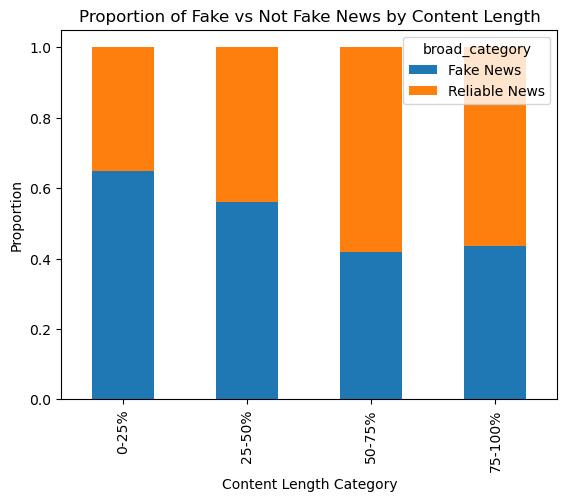

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'content' column is of type string and then calculate length
temp['content'] = temp['content'].astype(str)
temp['content_length'] = temp['content'].apply(len)


# Apply the function to the 'content' column to create a new 'length_category' column
temp['length_category'] = pd.qcut(temp['content_length'], 4, labels=['0-25%', '25-50%', '50-75%', '75-100%'])


# Use crosstab to analyze the distribution of fake vs not fake across different text lengths
category_correlation = pd.crosstab(index=temp['length_category'], columns=temp['broad_category'], normalize='index')

# Calculate correlation - Chi-square test to assess independence
contingency_table = pd.crosstab(index=temp['length_category'], columns=temp['broad_category'])
chi2, p, dof, expected = chi2_contingency(contingency_table)



# Plotting the proportions
category_correlation.plot(kind='bar', stacked=True)
plt.title('Proportion of Fake vs Not Fake News by Content Length')
plt.xlabel('Content Length Category')
plt.ylabel('Proportion')
plt.show()


In [19]:
temp['length_category'].value_counts()

length_category
0-25%      24953
50-75%     24890
75-100%    24853
25-50%     24804
Name: count, dtype: int64